<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 180px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 15px;
        font-weight: 400;
        color: #444;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Título</h1>
            <h2>NOSSOS NOMES OU SUBTÍTULO Group 37</h2>
        </div>
    </div>
</header>

</body>
</html>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

1.   FALAR SOBRE O **CRISP-DM** + PAPER + GRÁFICO/IMAGEM
2. FAZER INDEX
3. model assessment strategy that allows you to create and compare different candidate models to identify the most generalizable one. 
4.  Group Member CONTRIBUTIONS
5. ABSTRACT: 200 to 300 words. What is the context? What are your goals? What did you do? What were your main results, and what conclusions did you draw from them?

- Será que interessa a data? database from 2020
- Procurar a real base de dados 
- best (or set of best) model(s) -> explore ways to improve their performance (e.g. hyperparameter tuning or pre-processing/feature selection adjustments)
</div>


# <span style="color: #ffffff;">1 | Identifying Business Needs</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>1 | Identifying Business Needs</b></span>
    </h1>
</div>
<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Overview and main goals of the project ✅
- Description of the overall process and identification of model assessment approach adopted in the work (CV, LOO, Holdout, etc...
</div>

<br>

**Cars 4 You** is an online car resale company that buys vehicles from multiple brands and resells them for profit. Currently, cars must be inspected by mechanics before purchase, but growing demand has created long waiting lists. This delays the process and drives potential customers to competitors. The company’s main business need is to speed up car evaluations by developing a **predictive model that can estimate car prices directly from user-provided information**, without requiring a mechanic’s inspection. <br>
We have available the following attributes:

<div style="display: flex; justify-content: center; margin-top: 20px;">


|       | **Attribute**                               | **Description**                                                                  |
|-------|--------------------------------------------|---------------------------------------------------------------------------------|
| **0** | `carID`                               | An attribute that contains an identifier for each car                                                     |
| **1** | `Brand`                                 | The car’s main brand (e.g. Ford, Toyota)                                                               |
| **2** | `model`                              | The car model                                  |
| **3** | `year` | The year of Registration of the Car                   |
| **4** | `mileage`               |     The total reported distance travelled by the car (in miles)               |  
| **5** | `tax`                        | The amount of road tax (in £) that, in 2020, was applicable to the car in question                            |
| **6** | `fuelType`                         | Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)                             |
| **7** | `mpg`                                   | Average Miles per Gallon                                      |
| **8** | `engineSize`                                    | Size of Engine in liters (Cubic Decimeters)                                       |
| **9** | `paintQuality%`                                    | The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation)                                       |
| **10**| `previousOwners`                                | Number of previous registered owners of the vehicle                                   |
| **11**| `hasDamage`     | Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not                 |
| **12**| `price`                        | The car’s price when purchased by Cars 4 You (in £)                           |


</div  >

<div style="background-color:#e5c120ff; padding:1px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 213, 108, 1);">
</div>

In [1]:
# For data
import pandas as pd
import numpy as np
from collections import Counter

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# For the split
from sklearn.model_selection import train_test_split

# For encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# For preprocessing
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from math import ceil

# Disable FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style of the visualization
#pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.3f' % x) # display floats with 3 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

In [2]:
# Load both training and testing datasets
car_eval = pd.read_csv('../project_data/train.csv')
X_test = pd.read_csv('../project_data/test.csv')

#########!!!!!!!!!!!!
X_test.drop(columns=['hasDamage'])
car_eval.drop(columns=['hasDamage'])

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners
0,69512,VW,Golf,2016.000,22290,Semi-Auto,28421.000,Petrol,NaN,11.417,2.000,63.000,4.000
1,53000,Toyota,Yaris,2019.000,13790,Manual,4589.000,Petrol,145.000,47.900,1.500,50.000,1.000
2,6366,Audi,Q2,2019.000,24990,Semi-Auto,3624.000,Petrol,145.000,40.900,1.500,56.000,4.000
3,29021,Ford,FIESTA,2018.000,12500,anual,9102.000,Petrol,145.000,65.700,1.000,50.000,-2.340
4,10062,BMW,2 Series,2019.000,22995,Manual,1000.000,Petrol,145.000,42.800,1.500,97.000,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,Mercedes,C Class,2015.000,13498,Manual,14480.000,etrol,125.000,53.300,2.000,78.000,0.000
75969,6265,Audi,Q3,2013.000,12495,Semi-Auto,52134.000,Diesel,200.000,47.900,2.000,38.000,2.000
75970,54886,Toyota,Aygo,2017.000,8399,Automatic,11304.000,Petrol,145.000,67.000,1.000,57.000,3.000
75971,860,Audi,Q3,2015.000,12990,Manual,69072.000,iesel,125.000,60.100,2.000,74.000,2.000


# <span style="color: #ffffff;">2 |  Data Exploration and Preprocessing</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>2 | Data Exploration and Preprocessing</b></span>
    </h1>
</div>
<br>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Description of data received -> key insights
 - Steps taken to clean and prepare the data based on exploration
<br><br><br>
 - Check data contents, provide descriptive statistics and check for inconsistencies in the data.
 - Explore data visually and extract relevant insights. Explain your rationale and findings. Do not forget to analyse multivariate relationships.
 - Are there any missing values? Take action to handle them.
 - Check the dataset for outliers and pre-process them. Justify your decisions.
 - Deal with categorical variables.
 - Review current features and create extra features if needed. Explain your steps.
 - Perform data scaling. Explain the reasoning behind your choices.
 <br><br>

 - Define and implement a clear and unambiguous strategy for **feature selection**. Use the methods discussed in the course. Present and justify your final selection.


 FAZER **EDA**
</div>


## <span style="color: #ffffff;">2.1 |  Data Content</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.1 | Data Content</b></span>
    </h1>
</div>

In [3]:
car_eval.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.000,22290,Semi-Auto,28421.000,Petrol,NaN,11.417,2.000,63.000,4.000,0.000
1,53000,Toyota,Yaris,2019.000,13790,Manual,4589.000,Petrol,145.000,47.900,1.500,50.000,1.000,0.000
2,6366,Audi,Q2,2019.000,24990,Semi-Auto,3624.000,Petrol,145.000,40.900,1.500,56.000,4.000,0.000
3,29021,Ford,FIESTA,2018.000,12500,anual,9102.000,Petrol,145.000,65.700,1.000,50.000,-2.340,0.000
4,10062,BMW,2 Series,2019.000,22995,Manual,1000.000,Petrol,145.000,42.800,1.500,97.000,3.000,0.000


In [4]:
X_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878,Automatic,30700.000,petrol,205.000,41.500,1.600,61.000,3.000,0.000
1,106581,VW,Tiguan,2017.000,Semi-Auto,-48190.656,Petrol,150.000,38.200,2.000,60.000,2.000,0.000
2,80886,BMW,2 Series,2016.000,Automatic,36792.000,Petrol,125.000,51.400,1.500,94.000,2.000,0.000
3,100174,Opel,Grandland X,2019.000,Manual,5533.000,Petrol,145.000,44.100,1.200,77.000,1.000,0.000
4,81376,BMW,1 Series,2019.000,Semi-Auto,9058.000,Diesel,150.000,51.400,2.000,45.000,4.000,0.000


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

It is useful to use `.head()` function to get an overview of the variables and their contents, as well as a first impression of the preprocessing steps that will be required.

By observing just a few rows, we can already identify both categorical and numerical variables. Since categorical variables are present, we know that some type of encoding will be required before using them in the model. Some of the numerical variables (like `year` and `previousOwners`) should not be treated as continuous . It is also noticeable that there are missing values, at least in the variable `tax`. Additionally, there are some spelling errors and inconsistencies in text formatting, such as differences in lowercase and uppercase (ex: `transmission` includes both "Manual" and "anual").
</div>


In [5]:
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

It is also useful to use the `.info()` function to check the data types of each variable and identify the presence of missing values, which helps to plan the necessary preprocessing steps.

The train and test datasets contain the same variables, except for the target variable `price`, as expected. The data types are consistent across both datasets, however, some issues are present.

The training set contains 75,973 records and all variables have missing values except for the identifier `carID` and the target variable `price`.
The test set contains 32,566 records and also shows missing values in all variables except for the identifier `carID`.

Moreover, it can be noted that the variables `year` and `previousOwners` should indeed be numeric, but of integer type rather than continuous. The variable `hasDamage` should be boolean, as a car either has damage or it does not. Finally, `carID` should be categorical, but since it is a unique identifier and will not be used in the model, there is no need to modify its data type.

</div>


In [7]:
# Set "carID" as index since it is a unique identifier as confirmed by the .info() output
car_eval.set_index('carID', inplace=True)
X_test.set_index('carID', inplace=True)

## <span style="color: #ffffff;">2.2 |  Descriptive Statistics</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.2 | Descriptive Statistics</b></span>
    </h1>
</div>

In [8]:
# Get numerical columns
numeric_cols = car_eval.select_dtypes(include='number')

# Describe
numeric_desc = numeric_cols.describe().T

# Add skewness and kurtosis
numeric_desc['skew'] = numeric_cols.skew()
numeric_desc['kurtosis'] = numeric_cols.kurtosis()
numeric_desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
year,74482.000,2017.097,2.209,1970.000,2016.000,2017.000,2019.000,2024.122,-1.854,11.801
price,75973.000,16881.890,9736.926,450.000,10200.000,14699.000,20950.000,159999.000,2.284,12.001
mileage,74510.000,23004.184,22129.788,-58540.574,7423.250,17300.000,32427.500,323000.000,1.555,5.229
tax,68069.000,120.329,65.521,-91.122,125.000,145.000,145.000,580.000,0.051,3.563
mpg,68047.000,55.153,16.498,-43.422,46.300,54.300,62.800,470.800,7.297,158.657
engineSize,74457.000,1.660,0.573,-0.103,1.200,1.600,2.000,6.600,1.233,4.438
paintQuality%,74449.000,64.591,21.021,1.639,47.000,65.000,82.000,125.594,-0.011,-0.770
previousOwners,74423.000,1.995,1.473,-2.346,1.000,2.000,3.000,6.258,-0.003,-0.853
hasDamage,74425.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

In addition to the insights drawn so far from the numerical variables in the training dataset, we can further highlight:
- **`year`**: has a distribution centered around 2017, indicating that most cars in the dataset are relatively recent (from 2016 onwards). The minimum value of 1970 reveals a few much older vehicles. The negative skewness (-1.85) confirms a concentration of newer models, with a long left tail representing these rare older cars. The high kurtosis (11.8) further suggests a narrow and peaked distribution with extreme values, reinforcing that while some cars are old, the vast majority belong to modern years.

- **`price`**: has a mean of around 16,882 with considerable dispersion (std ≈ 9,737). About 75% of cars cost up to roughly 20,950, while the maximum price reaches nearly 160,000, indicating the presence of some luxury vehicles. The positive skew (2.28) shows a strongly right-skewed distribution, with most cars priced lower but a few extremely high values. The high kurtosis (12.0) further highlights a long-tailed distribution with notable outliers at the upper end.

- **`mileage`**: shows an average of around 23,000 miles with considerable dispersion (standard deviation ≈ 22,130), reflecting the diversity in vehicle usage. The quartiles indicate that 50% of cars have between approximately 7,400 and 32,400 miles, typical of relatively recent vehicles with regular use. The positive skewness (1.56) shows that most vehicles have low to moderate mileage, while a few have very high values. The kurtosis (5.23) confirms the presence of some outliers. The negative minimum value (-58,540) is unrealistic and will be corrected, although it does not substantially alter the overall pattern of the variable.
<!-- affecting the mean, standard deviation, and the lower tail. Despite this, the positive skew (1.56) indicates that most cars have moderate mileage, with a few high-mileage outliers -->

- **`tax`**: has an average of around £120, with values mostly concentrated between £125 and £145 (25th and 75th percentiles), suggesting that most cars fall within similar tax bands, typical of low- to mid-emission vehicles. The dispersion is moderate (std ≈ 65), and the near-zero skewness (0.05) indicates an approximately symmetric distribution, further supported by the kurtosis (3.56) close to normality. The negative value (-91.12) is logically impossible and slightly affects the symmetry of the distribution. We will treat or remove it to prevent bias in further analyses and predictive models.

- **`mpg`**: has an average of about 55 mpg, with most values ranging between 46 and 63 mpg, reflecting a dataset dominated by vehicles with fuel efficiency typical of modern cars. However, the strong right skewness (7.30) and extremely high kurtosis (158.66) indicate the presence of severe outliers that should be carefully examined. The negative minimum (-43.42) is physically impossible and should be removed. If not properly treated, this variable could distort its relationship with `price` in the final model and harm predictive performance.

- **`engineSize`**: presents a realistic distribution, with an average of 1.66L and most vehicles between 1.2L and 2.0L. The positive skewness (1.23) and slightly high kurtosis (4.44) indicate a few cars with larger engines, up to 6.6L. The negative minimum value (-0.1)  is technically impossible and may slightly influence the positive skew.

- **`paintQuality%`**: presents a balanced distribution (skew ≈ 0), with typical values ranging from 47% to 82%. The slightly abnormal maximum (125.59) could be due to minor measurement or scaling inconsistencies, but it does not significantly compromise the variable’s reliability.

- **`previousOwners`**: behaves coherently (mean ≈ 2), although the negative minimum (-2.35) is once again impossible. This error should be corrected, as it may impact the interpretation of cars with multiple previous owners. The distribution is nearly symmetric, showing consistent variability across this attribute.

- **`hasDamage`**: this analysis is not strictly appropriate, since the variable is binary (though its type has not yet been converted). Nonetheless, we can see no variation, all values are 0. This makes the variable meaningless in its current form, as it should be boolean (0 = no damage, 1 = damaged). Since the “1” category never appears, the feature provides no analytical value. It could be removed from the model, although we will further investigate its origin.

</div>


In [9]:
# Get numerical columns
numeric_cols_t = X_test.select_dtypes(include='number')

# Describe
numeric_desc_t = numeric_cols_t.describe().T

# Add skewness and kurtosis
numeric_desc_t['skew'] = numeric_cols_t.skew()
numeric_desc_t['kurtosis'] = numeric_cols_t.kurtosis()
numeric_desc_t

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
year,31914.000,2017.102,2.208,1991.000,2016.000,2017.000,2019.000,2024.122,-1.611,6.806
mileage,31878.000,22952.659,22132.759,-58540.574,7298.250,17225.500,32500.000,279000.000,1.485,4.461
tax,29259.000,120.569,65.561,-91.122,125.000,145.000,145.000,580.000,0.085,3.739
mpg,29279.000,55.211,17.645,-43.422,46.300,54.300,62.800,470.800,8.755,186.439
engineSize,31939.000,1.665,0.574,-0.103,1.200,1.600,2.000,6.600,1.179,3.929
paintQuality%,31942.000,64.447,21.142,1.639,47.000,65.000,82.000,125.594,-0.013,-0.736
previousOwners,31970.000,2.006,1.472,-2.346,1.000,2.000,3.000,6.258,-0.005,-0.808
hasDamage,31970.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the test set in comparison with the previously analyzed training set:
- **`year`**: maintains almost the same distribution, with an identical mean and equal interquartile ranges, but with a higher minimum value (1991 vs. 1970), indicating the absence of the oldest vehicles in the test set. The lower skewness (-1.61 vs. -1.85) and kurtosis (6.81 vs. 11.8) suggest a slightly less concentrated distribution with fewer extreme values.

- **`mileage`**: shows values that are nearly identical, including the same impossible negative minimum, showing that the same type of measurement error persists. However, there is a slight reduction in skewness (1.49 vs. 1.56) and kurtosis (4.46 vs. 5.23), suggesting a somewhat more balanced distribution.

- **`tax`**: exhibits an almost identical distribution between the two datasets, again including the invalid negative value. Both the mean and quartiles are nearly the same, indicating structural consistency in the test set. Minor variations in skewness (0.08 vs. 0.05) and kurtosis (3.74 vs. 3.56) are not significant.

- **`mpg`**: although the central statistics remain identical, the test set shows greater dispersion (std 17.64 vs. 16.50), higher skewness (8.76 vs. 7.30), and even higher kurtosis (186.44 vs. 158.66), reflecting a stronger presence of extreme values. The negative values remain and must be corrected, as they significantly influence the distribution and may harm the performance of the price prediction model.

- **`engineSize`**: behaves almost identically to the training set, with similar mean and dispersion. The slight decrease in skewness (1.18 vs. 1.23) and kurtosis (3.93 vs. 4.44) indicates a marginally more homogeneous distribution in the test set.

- **`paintQuality%`**: shows very similar distributions across both datasets. The means (≈64.5) and quartiles remain practically unchanged, as do the shape measures (skewness and kurtosis near zero), demonstrating stability and good representativeness of this variable between training and testing.

- **`previousOwners`**: has nearly identical values, including the same impossible negative minimum (-2.35). The means (≈2) and quartiles match, and the distribution remains symmetric, confirming consistency across datasets, although the negative anomaly still needs correction. 

- **`hasDamage`**: continues to show no variation, containing only zeros in both datasets. The recommendation stands where its source should be reviewed, and its removal from the model should be considered.

</div>


In [10]:
# Get categorical columns
cat_cols = car_eval.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc = cat_cols.describe().T

# Add proportion of the most frequent category
cat_desc['top_freq_ratio'] = cat_desc['freq'] / cat_desc['count']

cat_desc

,count,unique,top,freq,top_freq_ratio
Brand,74452,72,Ford,14808,0.199
model,74456,735,Focus,6353,0.085
transmission,74451,40,Manual,38050,0.511
fuelType,74462,34,Petrol,37995,0.510


<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

EM RELAÇÃO ÀS VARIÁVEIS CATEGÓRICAS DO TRAIN SET PODEMOS AFIRMAR QUE:

</div>


In [11]:
# Get categorical columns
cat_cols_t = X_test.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc_t = cat_cols_t.describe().T

# Add proportion of the most frequent category
cat_desc_t['top_freq_ratio'] = cat_desc_t['freq'] / cat_desc_t['count']

cat_desc_t

,count,unique,top,freq,top_freq_ratio
Brand,31918,64,Ford,6360,0.199
model,31917,593,Focus,2721,0.085
transmission,31944,38,Manual,16312,0.511
fuelType,31911,29,Petrol,16113,0.505


In [12]:
X = car_eval.drop(columns=['price'])
y = car_eval[['price']]

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 0)

<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

É extremamente relevante separar realmente o train do validation antes de imputar valores ou fazer qualquer transformação que dependa dos dados de treino. Caso contrário, estaríamos a introduzir **data leakage**.

</div>


In [13]:
# Check for missing values in the training, validation, and test sets
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean()*100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean()*100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean()*100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

,Train n,Train %,Validation n,Validation %,Test n,Test %
Brand,1211,1.990,310,2.040,649,1.990
model,1183,1.950,334,2.200,650,2.000
year,1198,1.970,293,1.930,653,2.010
transmission,1235,2.030,287,1.890,623,1.910
mileage,1149,1.890,314,2.070,689,2.120
fuelType,1189,1.960,322,2.120,656,2.010
tax,6316,10.390,1588,10.450,3308,10.160
mpg,6321,10.400,1605,10.560,3288,10.100
engineSize,1197,1.970,319,2.100,628,1.930
paintQuality%,1231,2.030,293,1.930,625,1.920


<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

ANTES DE PASSARMOS ÀS INCONSISÊNCIAS QUERO PRINTAR O CARID PARA CADA VARIÁVEL QUE TEM ISSO A MISSING E A % DE MISSING QUE ESSA VARIÁVEL TEM

</div>


In [14]:
# # ###########################################################################################################################################
# Para cada variável, printar os carID que têm missing e entre parêntesis a contagem cumulativa de vezes que esse carID já apareceu como missing


# # Counter to keep track of how many times each carID appears with missing values
# missing_counter = Counter()

# # Iterate over each column
# for col in X_train.columns:
#     # Find rows where the column has missing values
#     missing_mask = X_train[col].isna()
    
#     # Get the carIDs from the index where missing
#     missing_ids = X_train.index[missing_mask].tolist()
    
#     if not missing_ids:
#         print(f'{col}: no missing values')
#         continue
    
#     # For each carID with missing, increment counter and prepare the print
#     prints = []
#     for cid in missing_ids:
#         missing_counter[cid] += 1
#         prints.append(f'{cid} ({missing_counter[cid]})')
    
#     # Print column name followed by carIDs with cumulative missing counts
#     print(f'{col}: ' + ', '.join(prints))

## <span style="color: #ffffff;">2.3 |  Inconsistency Checks</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.3 | Inconsistency Checks</b></span>
    </h1>
</div>

In [15]:
# Get unique counts for each column
unique_counts = car_eval.nunique()

# Filter columns with less than 100 unique values
filtered_col = [col for col in unique_counts.index if unique_counts[col] < 100]

# Display unique values for filtered columns
print("\033[1mUnique values for each column:\033[0m")
for col in filtered_col:
    print(f"{col} ({unique_counts[col]}): {car_eval[col].unique()}\n")

Unique values for each column:
Brand (72): ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']

year (44): [2016.         2019.         2018.         2014.         2017.
 2020.         2013.                   nan 2015.         2023.36707842
 2011.         2012.         2023.1169636  2003.         2009.
 2007.         2005.         2011.11118842 2011.21085349 2023.97731126
 2004.         2010.         2010.56500919 2008.         2024.12175905
 2006.         2023.60527574 2023.38982198 2010.67696784 2001.
 2000.     

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

We were already aware of some inconsistencies, but here we can get a clearer picture of them. In the next section, we will address the inconsistencies found in the training set and take the opportunity to create general consistency rules that can also be applied to the test set.
</div>

<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- *Transmission*: temos mal escrito ou em maíusculas e minusculas
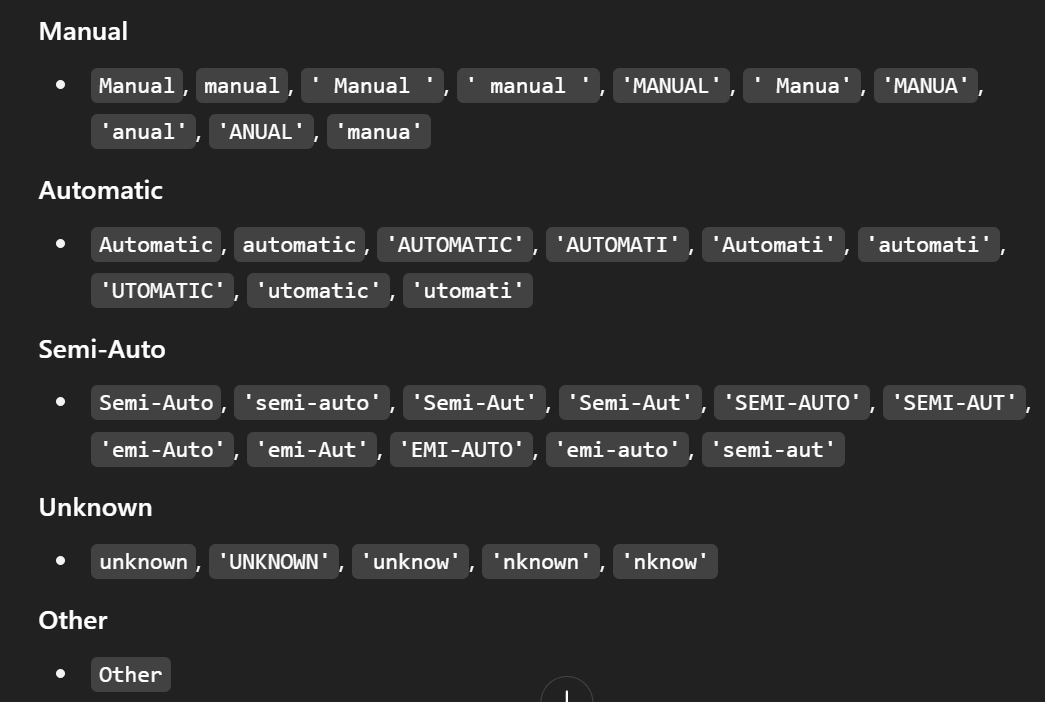
- *FuelType*: temos mal escrito ou em maíusculas e minusculas e parece que o prof. diz só existe (Diesel, Petrol, Hybrid, Electric)


</div>

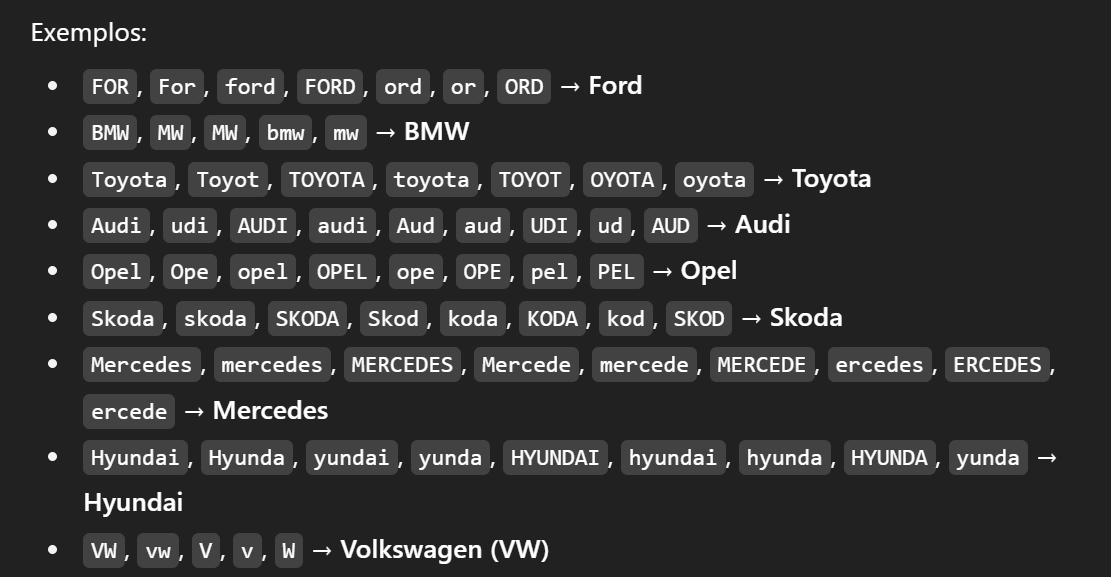

### <span style="color: #ffffff;">2.3.1 |  Brand</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.1 |  Brand</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.2 |  model</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.2 |  model</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.3 |  year</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.3 |  year</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `year` variable, we know that the year must be a positive integer, so we will truncate the decimal values and take their absolute value. We also know that cars cannot have a year later than the current year. Additionally, we will consider that a car cannot be older than [30](https://www.fbhvc.co.uk/news/article/eu-parliament-re-defines-historic-vehicles?.com) years to be sold on this platform. Any values outside this range will be considered errors and will be rounded to the nearest limit.



**<span style="color:red">1. PROCURAR UMA FONTE MELHOR. 2. DEVO CONSIDERAR SE FOR -1996 PÔR 1996 OU APENAS O LIMITE MAIS PRÓXIMO?</span>**


In [16]:
# 'year' has to be a positive integer and between 30 years ago and now

# Convert 'year' to integer and take absolute value; if NaN, keep as NaN
X_train["year"] = X_train["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)



current_year = datetime.now().year
# correct values outside the range [current_year-30, current_year] to the closest limit
X_train.loc[(X_train["year"] < current_year-30), "year"] = current_year-30
X_train.loc[(X_train["year"] > current_year), "year"] = current_year


# do exactly the same for the validation and test set
X_val["year"] = X_val["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
X_val.loc[(X_val["year"] < current_year-30), "year"] = current_year-30
X_val.loc[(X_val["year"] > current_year), "year"] = current_year

X_test["year"] = X_test["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
X_test.loc[(X_test["year"] < current_year-30), "year"] = current_year-30
X_test.loc[(X_test["year"] > current_year), "year"] = current_year

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

PRICE

### <span style="color: #ffffff;">2.3.4 |  transmission</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.4 |  transmission</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.5 |  mileage</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.5 |  mileage</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.6 |  fuelType</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.6 |  fuelType</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.7 |  tax</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.7 |  tax</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.8 |  mpg</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.8 |  mpg</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.9 |  engineSize</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.9 |  engineSize</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.10 |  paintQuality%</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.10 |  paintQuality%</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.11 |  previousOwners</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.11 |  previousOwners</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.3.12 |  hasDamage</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.3.12 |  hasDamage</b></span>
    </h1>
</div>

In [17]:
#DUPLICATES

## <span style="color: #ffffff;">2.4 | Explore Data Visualizations</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.4 | Explore Data Visualizations</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.5 |  Missing Data</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.5 | Missing Data</b></span>
    </h1>
</div>

In [18]:
# Check for missing values in the training, validation, and test sets
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean() * 100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean() * 100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean() * 100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

,Train n,Train %,Validation n,Validation %,Test n,Test %
Brand,1211,1.990,310,2.040,649,1.990
model,1183,1.950,334,2.200,650,2.000
year,1198,1.970,293,1.930,653,2.010
transmission,1235,2.030,287,1.890,623,1.910
mileage,1149,1.890,314,2.070,689,2.120
fuelType,1189,1.960,322,2.120,656,2.010
tax,6316,10.390,1588,10.450,3308,10.160
mpg,6321,10.400,1605,10.560,3288,10.100
engineSize,1197,1.970,319,2.100,628,1.930
paintQuality%,1231,2.030,293,1.930,625,1.920


In [19]:
# fill missing values with median or mode
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']: # Numerical variables
        median = X_train[col].median()
        X_train[col].fillna(median, inplace=True)
        X_val[col].fillna(median, inplace=True)
        X_test[col].fillna(median, inplace=True)
    else:  # Categorical variables
        mode = X_train[col].mode()[0]
        X_train[col].fillna(mode, inplace=True)
        X_val[col].fillna(mode, inplace=True)
        X_test[col].fillna(mode, inplace=True)

In [20]:
# Check for duplicates in the training set
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean() * 100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean() * 100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean() * 100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

,Train n,Train %,Validation n,Validation %,Test n,Test %
Brand,0,0.000,0,0.000,0,0.000
model,0,0.000,0,0.000,0,0.000
year,0,0.000,0,0.000,0,0.000
transmission,0,0.000,0,0.000,0,0.000
mileage,0,0.000,0,0.000,0,0.000
fuelType,0,0.000,0,0.000,0,0.000
tax,0,0.000,0,0.000,0,0.000
mpg,0,0.000,0,0.000,0,0.000
engineSize,0,0.000,0,0.000,0,0.000
paintQuality%,0,0.000,0,0.000,0,0.000


## <span style="color: #ffffff;">2.6 |  Outliers</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.6 | Outliers</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.7 |  Categorical Variables</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.7 | Categorical Variables</b></span>
    </h1>
</div>

In [21]:
# Categorical variables
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
categorical_cols

['Brand', 'model', 'transmission', 'fuelType']

In [22]:
# Make copies of the datasets
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
X_test_enc = X_test.copy()

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Fit the encoder on the categorical columns (train + val + test)
ohe.fit(pd.concat([X_train_enc[['Brand', 'model', 'transmission', 'fuelType']],
                   X_val_enc[['Brand', 'model', 'transmission', 'fuelType']],
                   X_test_enc[['Brand', 'model', 'transmission', 'fuelType']]], axis=0))

# Helper function to transform and join to the dataset
def apply_ohe(df, encoder):
    transformed = encoder.transform(df[['Brand', 'model', 'transmission', 'fuelType']])
    transformed_df = pd.DataFrame(transformed, 
                                  columns=encoder.get_feature_names_out(['Brand', 'model', 'transmission', 'fuelType']),
                                  index=df.index)
    df = pd.concat([df.drop(columns=['Brand', 'model', 'transmission', 'fuelType']), transformed_df], axis=1)
    return df

# Apply to train, val and test
X_train_enc = apply_ohe(X_train_enc, ohe)
X_val_enc = apply_ohe(X_val_enc, ohe)
X_test_enc = apply_ohe(X_test_enc, ohe)

## <span style="color: #ffffff;">2.8 |  Review Current Features</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.8 | Review Current Features</b></span>
    </h1>
</div>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Pôr simples gráficos e comparar o antes (guardar foto) e depois de grande parte do pre-processing
</div>


## <span style="color: #ffffff;">2.9 | Create Extra Features</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.9 | Create Extra Features</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.10 | Data Scaling</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.10 | Data Scaling</b></span>
    </h1>
</div>

In [23]:
# Apply MinMaxScaler to the training, validation and test data 
scaler = StandardScaler()
X_train_enc = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns, index=X_train_enc.index)
X_val_enc = pd.DataFrame(scaler.transform(X_val_enc), columns=X_val_enc.columns, index=X_val_enc.index)
X_test_enc = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns, index=X_test_enc.index)

## <span style="color: #ffffff;">2.11 | Feature Selection</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Optimization efforts: presentation, results and discussion
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Model definitions
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train_enc, y_train) 
    
    # Predict on validation set
    y_pred = model.predict(X_val_enc)
    
    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
    
    # Print results
    print(f"{model_name} MAE: {mae:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")
    print(f"{model_name} R²: {r2:.4f}")
    print("-" * 50)

# Print summary of all models
print("\nModel Evaluation Results Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

Training LinearRegression...
LinearRegression MAE: 2554.5123
LinearRegression RMSE: 4174.7889
LinearRegression R²: 0.8206
--------------------------------------------------
Training Ridge...
LinearRegression MAE: 2554.5123
LinearRegression RMSE: 4174.7889
LinearRegression R²: 0.8206
--------------------------------------------------
Training Ridge...
Ridge MAE: 2553.6070
Ridge RMSE: 4173.2138
Ridge R²: 0.8208
--------------------------------------------------
Training Lasso...
Ridge MAE: 2553.6070
Ridge RMSE: 4173.2138
Ridge R²: 0.8208
--------------------------------------------------
Training Lasso...
Lasso MAE: 2551.6108
Lasso RMSE: 4170.9067
Lasso R²: 0.8210
--------------------------------------------------
Training RandomForest...
Lasso MAE: 2551.6108
Lasso RMSE: 4170.9067
Lasso R²: 0.8210
--------------------------------------------------
Training RandomForest...


c:\Users\filip\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest MAE: 1483.6105
RandomForest RMSE: 2516.0255
RandomForest R²: 0.9349
--------------------------------------------------
Training GradientBoosting...


c:\Users\filip\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoosting MAE: 2321.9590
GradientBoosting RMSE: 3489.0630
GradientBoosting R²: 0.8747
--------------------------------------------------
Training DecisionTree...
DecisionTree MAE: 1952.7124
DecisionTree RMSE: 3365.4139
DecisionTree R²: 0.8834
--------------------------------------------------
Training KNeighbors...
DecisionTree MAE: 1952.7124
DecisionTree RMSE: 3365.4139
DecisionTree R²: 0.8834
--------------------------------------------------
Training KNeighbors...
KNeighbors MAE: 2384.8373
KNeighbors RMSE: 4107.8976
KNeighbors R²: 0.8263
--------------------------------------------------

Model Evaluation Results Summary:
LinearRegression: MAE = 2554.5123, RMSE = 4174.7889, R² = 0.8206
Ridge: MAE = 2553.6070, RMSE = 4173.2138, R² = 0.8208
Lasso: MAE = 2551.6108, RMSE = 4170.9067, R² = 0.8210
RandomForest: MAE = 1483.6105, RMSE = 2516.0255, R² = 0.9349
GradientBoosting: MAE = 2321.9590, RMSE = 3489.0630, R² = 0.8747
DecisionTree: MAE = 1952.7124, RMSE = 3365.4139, R² = 0.8834


In [ ]:
# Sem criar nem tirar variáveis (sem feature selection), usando OHE, sem tratar inconsistências, sem tratar outliers, sem fazer hyperparameter tuning
# tratando missing values com média, usando StandardScaler
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.7321, RMSE = 4177.1965, R² = 0.8204
# Ridge: MAE = 2553.7875, RMSE = 4175.5577, R² = 0.8206
# Lasso: MAE = 2551.7477, RMSE = 4173.1808, R² = 0.8208
# RandomForest: MAE = 1482.2024, RMSE = 2499.0898, R² = 0.9357
# GradientBoosting: MAE = 2321.1029, RMSE = 3500.0157, R² = 0.8739
# DecisionTree: MAE = 1941.1537, RMSE = 3275.1219, R² = 0.8896
# KNeighbors: MAE = 2384.9863, RMSE = 4107.6665, R² = 0.8264


#--------------------------------------------------
# + tirar hasDamage e ver inconsistências em year
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.5123, RMSE = 4174.7889, R² = 0.8206
# Ridge: MAE = 2553.6070, RMSE = 4173.2138, R² = 0.8208
# Lasso: MAE = 2551.6108, RMSE = 4170.9067, R² = 0.8210
# RandomForest: MAE = 1483.6105, RMSE = 2516.0255, R² = 0.9349
# GradientBoosting: MAE = 2321.9590, RMSE = 3489.0630, R² = 0.8747
# DecisionTree: MAE = 1952.7124, RMSE = 3365.4139, R² = 0.8834
# KNeighbors: MAE = 2384.8373, RMSE = 4107.8976, R² = 0.8263
#não houve grandes alterações, em alguns modelos melhorou, noutros piorou



<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
Para muitas destas variáveis era precisa scaling da target

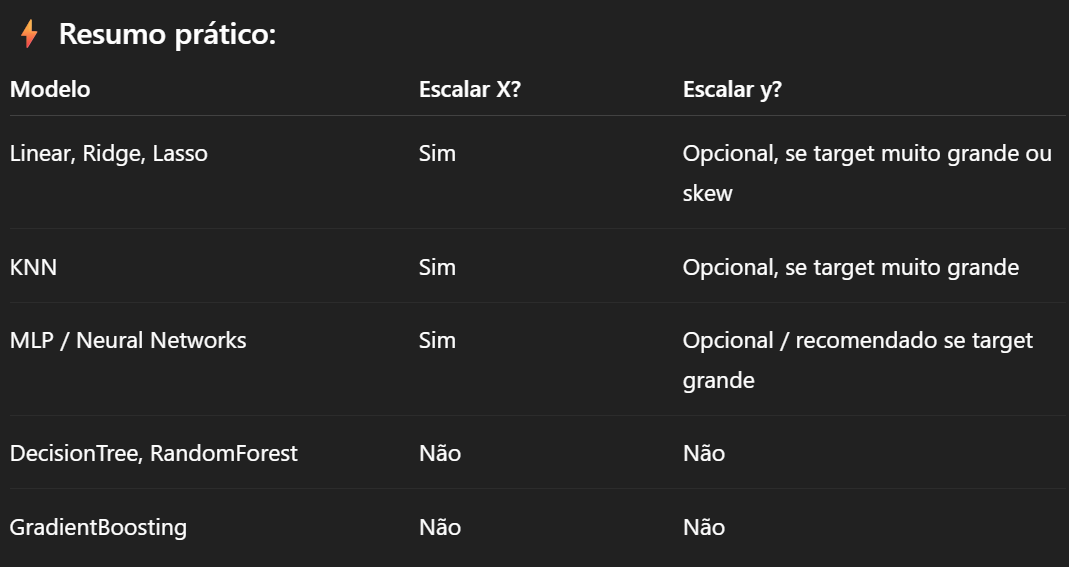

</div>


In [26]:

# Iterar sobre cada modelo
